In [95]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df1 = pd.read_csv("202004-divvy-tripdata.csv")

df2 = pd.read_csv("202006-divvy-tripdata.csv")

df3 = pd.read_csv("202007-divvy-tripdata.csv")


In [97]:
print(df1.columns.intersection(df2.columns))

print(df2.columns.intersection(df3.columns))

print(df1.columns.intersection(df3.columns))

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [98]:
df = pd.concat([df1, df2, df3])

In [99]:
df['started_at'] = pd.to_datetime(df['started_at'])

df['ended_at'] = pd.to_datetime(df['ended_at'])

In [100]:
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60

In [101]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,26.816667
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.150000
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.383333
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.200000
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667


In [102]:
df['trip_duration'] = df['trip_duration'].abs()

In [103]:
(df["trip_duration"] < 0).sum()

0

In [104]:
df["day_of_week"] = df["started_at"].dt.day_name()

# df["day_of_week"] = df["started_at"].dt.strftime("%a")  - for abbreviations

In [105]:
df['member_casual'] = df['member_casual'].replace({'member': 'annual'})

In [106]:
df.rename(columns = {'member_casual': 'membership_type'}, inplace=True)

In [107]:
descriptive_stats = df.groupby('membership_type')['trip_duration'].describe()

print("Descriptive Statistics for Trip Duration:")
print(descriptive_stats)

Descriptive Statistics for Trip Duration:
                    count       mean         std  min        25%        50%  \
membership_type                                                               
annual           531619.0  18.487418  144.132024  0.0   7.816667  13.716667   
casual           447642.0  57.679659  513.873542  0.0  14.050000  25.083333   

                       75%           max  
membership_type                           
annual           23.083333  58720.033333  
casual           49.383333  55683.883333  


In [108]:
descriptive_stats.index.tolist()

['annual', 'casual']

Text(0.5, 1.0, 'Mean Trip Duration by Membership Type')

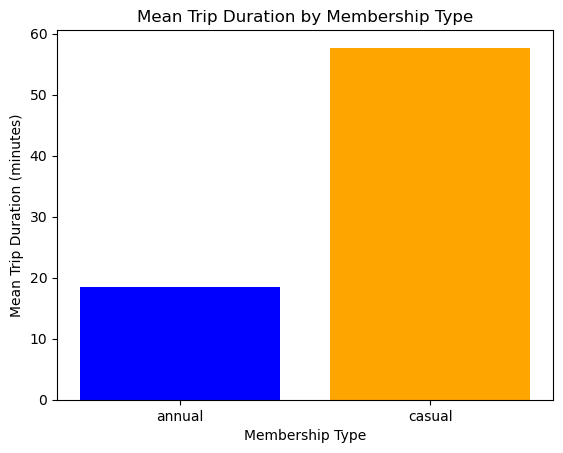

In [109]:
plt.bar(descriptive_stats.index.tolist(), descriptive_stats['mean'], color = ['blue', 'orange'])

plt.xlabel("Membership Type")
plt.ylabel("Mean Trip Duration (minutes)")
plt.title("Mean Trip Duration by Membership Type")

In [110]:
mode_days_of_week = df.groupby('membership_type')['day_of_week'].agg(lambda x: x.mode()[0])
mode_counts = df.groupby('membership_type')['day_of_week'].apply(lambda x: x.value_counts().iloc[0])

mode_days_of_week = pd.DataFrame({
    'Most_Common_Day': mode_days_of_week,
    'Count': mode_counts
})

print("Mode Count for Days of the Week:")
print(mode_days_of_week)


Mode Count for Days of the Week:
                Most_Common_Day  Count
membership_type                       
annual                 Thursday  85340
casual                 Saturday  91206


In [114]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

days_of_weeks = df.groupby('membership_type')['day_of_week'].apply(lambda x: x.value_counts()).sort_index()

days_of_weeks

membership_type           
annual           Monday       65322
                 Tuesday      72754
                 Wednesday    73864
                 Thursday     85340
                 Friday       81691
                 Saturday     78789
                 Sunday       73859
casual           Monday       44942
                 Tuesday      48518
                 Wednesday    48427
                 Thursday     60642
                 Friday       71207
                 Saturday     91206
                 Sunday       82700
Name: day_of_week, dtype: int64

In [115]:
df_plot = days_of_weeks.reset_index()

df_plot.columns = ['membership_type', 'day_of_week', 'count']

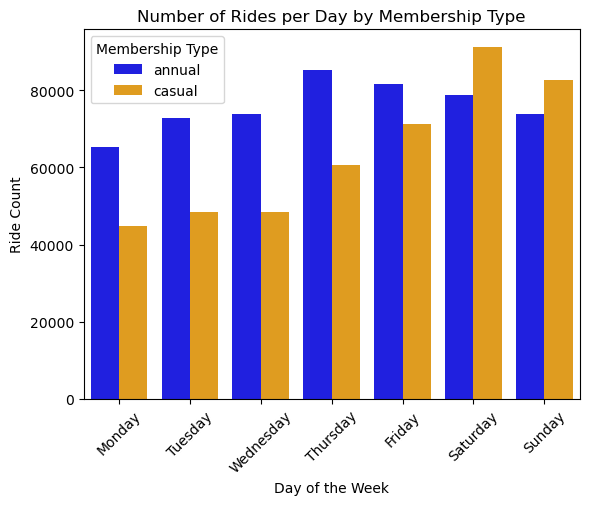

In [116]:
sns.barplot(x = 'day_of_week', y = 'count', hue = 'membership_type', data=df_plot, palette=['blue', 'orange'])

plt.xlabel("Day of the Week")
plt.ylabel("Ride Count")
plt.title("Number of Rides per Day by Membership Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Membership Type")

<Figure size 1200x600 with 0 Axes>

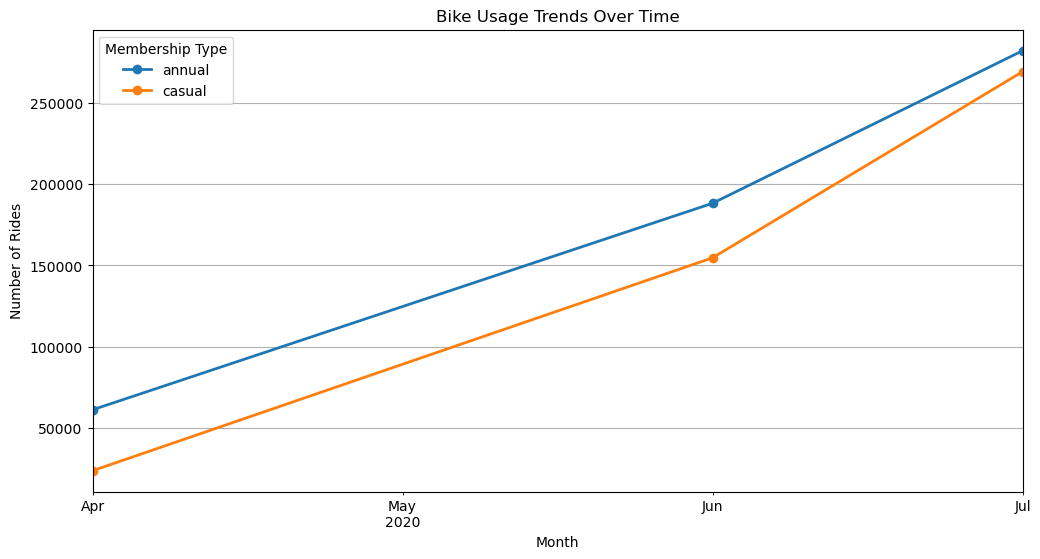

In [118]:
 Usage Trends Over Time

df['started_at'] = pd.to_datetime(df['started_at'])  

# Extract month and group by membership type  
df['month'] = df['started_at'].dt.to_period('M')  

# Count rides per month for each membership type  
monthly_trends = df.groupby(['month', 'membership_type']).size().unstack()

plt.figure(figsize=(12, 6))
monthly_trends.plot(marker='o', linewidth=2, figsize=(12,6))

plt.title('Bike Usage Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='Membership Type')
plt.grid(True)
plt.show()

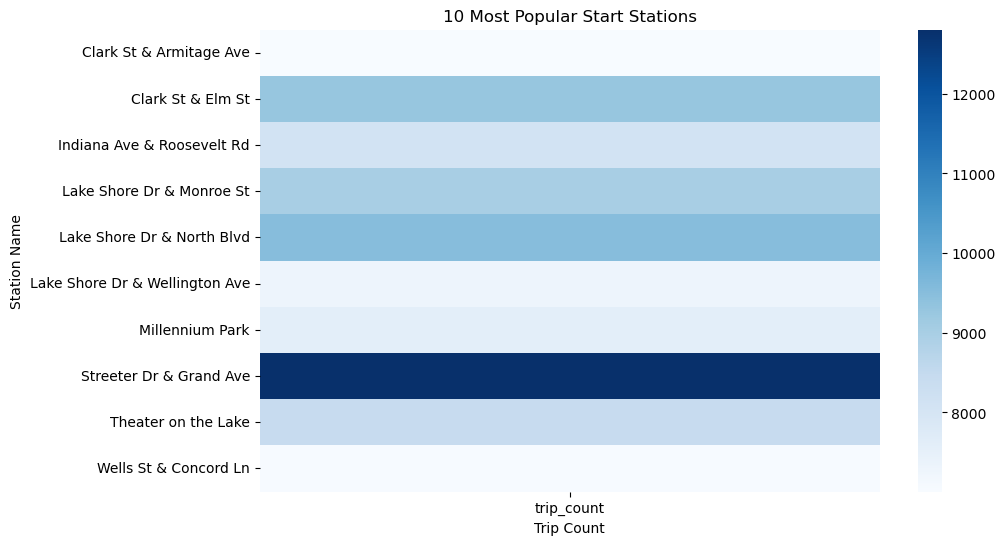

In [121]:
# Top 10 popular stations  
top_stations = df['start_station_name'].value_counts().nlargest(10).reset_index()  
top_stations.columns = ['start_station_name', 'trip_count']

# Plot heatmap  
plt.figure(figsize=(10, 6))
sns.heatmap(top_stations.pivot_table(index='start_station_name', values='trip_count'), cmap="Blues", annot=False)

plt.title("10 Most Popular Start Stations")
plt.ylabel("Station Name")
plt.xlabel("Trip Count")
plt.show()

AttributeError: 'function' object has no attribute 'value_counts'

In [ ]:
df.to_csv('Apr_May_Jun_Jul_cyclistic.csv', index = True)

1. How do annual members and casual riders use Cyclistic bikes differently?
From the provided data and visualizations, the key differences in bike usage patterns between annual members and casual riders are:

Trip Duration:

Casual riders have significantly longer average trip durations (58 minutes) compared to annual members (18 minutes).
This suggests that casual riders use bikes for leisure, while members use them for regular commuting.
Ride Frequency by Day of the Week:

Annual members have a consistent usage pattern throughout the week, with slightly higher rides on weekdays (suggesting commuting).
Casual riders have the highest number of rides on weekends, especially Saturdays and Sundays, indicating recreational usage.

Ride Frequency by Day of the Week:

Annual members have a consistent usage pattern throughout the week, with slightly higher rides on weekdays (suggesting commuting).
Casual riders have the highest number of rides on weekends, especially Saturdays and Sundays, indicating recreational usage.

2. What story does the data tell?

The data suggests that:

Annual members use bikes for shorter, frequent, and weekday rides, likely for commuting.
Casual riders use bikes for longer rides, mainly on weekends, possibly for leisure or tourism.
Since casual riders already use the service, there's a strong opportunity to convert them into annual members by highlighting membership benefits, such as cost savings and convenience for frequent users.

Following are some of the insights that help shape marketing strategies:

1. Targeting casual riders with weekday-based discounts or incentives to encourage more regular usage.

2. Promoting cost savings of memberships for riders taking longer trips frequently.

3. Using digital media (email, app notifications, social media ads) to educate casual users on membership benefits.

3. Membership Trends Over Time:

There is a steady increase in bike usage from April to July for both annual and casual members.

Casual riders are catching up with annual members by July, indicating potential growth in one-time or short-term users.

Business Action: This suggests an opportunity to convert casual riders into annual members through targeted promotions or discounts.

4. Analysis based on Start Stations popularity:

High-traffic stations like "Streeter Dr & Grand Ave" and "Clark St & Elm St" indicate key areas of demand.

Business Action: Consider adding more bike docks or promotional offers near high-demand stations. Also, stations with slightly lower traffic could benefit from local marketing efforts to balance demand.